# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
# Get weather data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
count = 1
cities_weather = []

for city in cities:
    final_url = f"{url}&appid={weather_api_key}&q={city}&units={units}"

     # Increase counter by one 
    
    print("Processing Record"+str(count)+"of"+str(len(cities))+"|"+city)


    

    try:
        response = requests.get(final_url).json()
        cities_weather.append({'City':city,
                               'Lat':response['coord']['lat'],
                               'Lng':response['coord']['lon'],
                               'Max Temp':response['main']['temp_max'],
                               'Humidity':response['main']['humidity'],
                               'Cloudiness':response['clouds']['all'],
                               'Wind Speed':response['wind']['speed'],
                               'Country':response['sys']['country'],
                               'Date':response['dt']})
    except:
        print('City not found. Skipping...')
        pass
    count=count+1  
    

print('Data Retrieval Complete')      


Processing Record1of612|hithadhoo
Processing Record2of612|victoria
Processing Record3of612|punta arenas
Processing Record4of612|turuvekere
Processing Record5of612|thinadhoo
Processing Record6of612|lorengau
Processing Record7of612|jamestown
Processing Record8of612|berlevag
Processing Record9of612|busselton
Processing Record10of612|albany
Processing Record11of612|saskylakh
Processing Record12of612|kamenskoye
City not found. Skipping...
Processing Record13of612|kahului
Processing Record14of612|margate
Processing Record15of612|hobart
Processing Record16of612|westport
Processing Record17of612|puerto colombia
Processing Record18of612|geraldton
Processing Record19of612|svetlyy
Processing Record20of612|asau
Processing Record21of612|lompoc
Processing Record22of612|ushuaia
Processing Record23of612|cape town
Processing Record24of612|collie
Processing Record25of612|saldanha
Processing Record26of612|kalemie
Processing Record27of612|saint-philippe
Processing Record28of612|thompson
Processing Record2

In [40]:
cities_weather_df = pd.DataFrame(cities_weather)
cities_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.6000,73.0833,84.06,71,100,12.39,MV,1624279984
1,victoria,22.2855,114.1577,87.85,82,100,1.01,HK,1624279984
2,punta arenas,-53.1500,-70.9167,39.31,81,90,8.05,CL,1624279963
3,turuvekere,13.1642,76.6667,80.89,52,100,13.27,IN,1624279986
4,thinadhoo,0.5333,72.9333,83.97,71,100,13.11,MV,1624279986


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
cities_weather_df.to_csv(output_data_file)

In [16]:
cities_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


In [53]:
cities_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.6000,73.0833,84.06,71,100,12.39,MV,1624279984
1,victoria,22.2855,114.1577,87.85,82,100,1.01,HK,1624279984
2,punta arenas,-53.1500,-70.9167,39.31,81,90,8.05,CL,1624279963
3,turuvekere,13.1642,76.6667,80.89,52,100,13.27,IN,1624279986
4,thinadhoo,0.5333,72.9333,83.97,71,100,13.11,MV,1624279986


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [55]:
cities_weather_df['Humidity'].unique()

array([ 71,  82,  81,  52,  79,  93,  76,  48,  80,  91,  90,  94,  84,
        62,  53,  59,  46,  74,  75,  42,  49,  85,  83,  87,  89,  64,
        78,  65,  14,  69,  54,  96,  67,  63,  88,  40, 100,  95,  70,
        43,  73,  57,  97,  77,  35,  55,  19,  18,  21,  86,  32,  72,
         6,  20,  27,  61,  28,  41,  12,  50,  99,  58,  51,  92,  68,
        37,  23,  25,  26,  31,  66,  56,  13,  47,  29,  33,  60,  36,
        44,  39,  24,   7,  16,  30,   5,  38,  98,  10,  34,  45],
      dtype=int64)

In [17]:
#  Get the indices of cities that have humidity over 100%.
#seems no city have humidity over100%

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

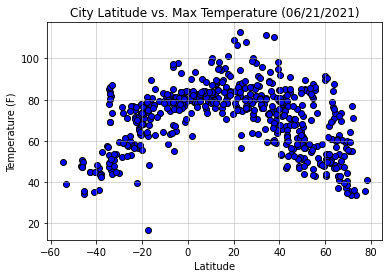

In [63]:
# Latitude vs. Temperature Plot
plt.scatter(cities_weather_df['Lat'],cities_weather_df['Max Temp'],facecolors = "blue", edgecolors ="black", marker ="o")
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
# Save fig
plt.savefig("output_data/City_Latitude_vs_Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

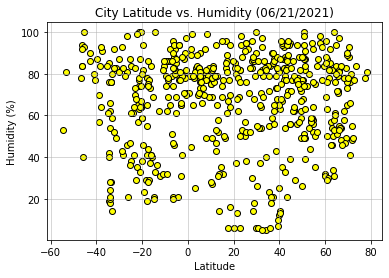

In [64]:
# Latitude vs. Humidity Plot
plt.scatter(cities_weather_df["Lat"],cities_weather_df["Humidity"],facecolors = "yellow", edgecolors ="black",marker ="o")
plt.title(f'City Latitude vs. Humidity ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
# Save fig
plt.savefig("output_data/City_Latitude_vs_Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

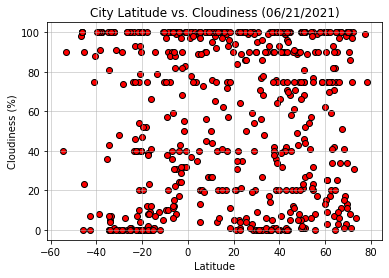

In [65]:
# Latitude vs. Cloudiness Plot
plt.scatter(cities_weather_df['Lat'],cities_weather_df['Cloudiness'],facecolors = "red", edgecolors ="black", marker ="o")
plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save fig
plt.savefig("output_data/City_Latitude_vs_Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

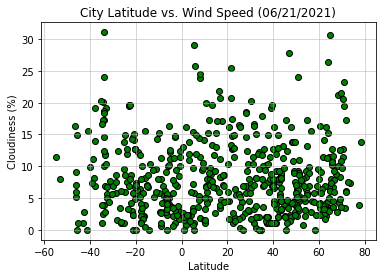

In [66]:
# Latitude vs. Wind Speed Scatter Plot 
plt.scatter(cities_weather_df["Lat"],cities_weather_df["Wind Speed"],facecolors = "green", edgecolors ="black", marker ="o")
plt.title(f'City Latitude vs. Wind Speed ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save fig
plt.savefig("output_data/City_Latitude_vs_WindSpeed.png")

plt.show()

## Linear Regression

In [71]:
# define a function called plot_linregress
def plot_linregress(X, y, title):
    print(f"The r-squared is: {round(st.pearsonr(X, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(X, y)
    regress_values = X * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "X + " + str(round(intercept,2))
    plt.scatter(X, y)
    plt.plot(X,regress_values,"r-")
    plt.title(title + '\n' + line_eq)
    plt.xlabel(X.name)
    plt.ylabel(y.name)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.65


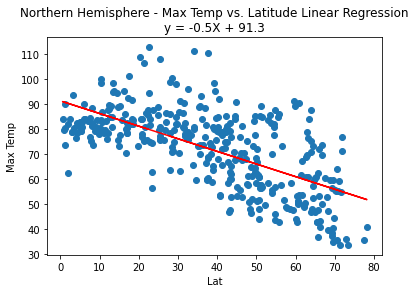

In [72]:
# Create Northern DataFrames
northern_hemisphere_df = cities_weather_df.loc[cities_weather_df['Lat'] >= 0]
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plot_linregress(northern_hemisphere_df['Lat'], northern_hemisphere_df['Max Temp'], 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
# from the linear regression we can find that Max Temp and Latitude are somehow related in northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.67


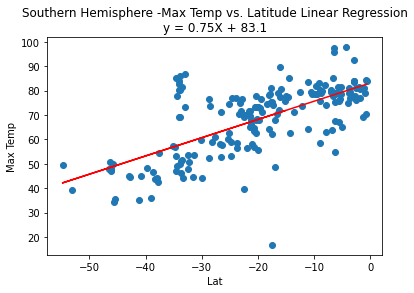

In [74]:
# Create Sourthern DataFrames
southern_hemisphere_df = cities_weather_df.loc[cities_weather_df['Lat'] < 0]

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

plot_linregress(southern_hemisphere_df['Lat'], southern_hemisphere_df['Max Temp'], 'Southern Hemisphere -Max Temp vs. Latitude Linear Regression')
# from the linear regression we can find that Max Temp and Latitude are highly related in southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.01


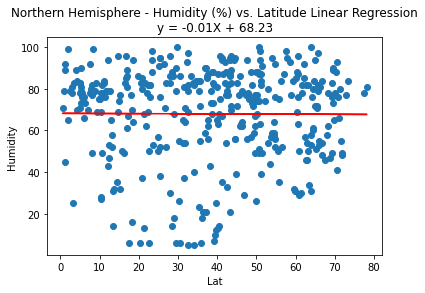

In [75]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plot_linregress(northern_hemisphere_df['Lat'], northern_hemisphere_df['Humidity'], 'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
# from the linear regression we can find that humidity and latitude do not have good linear coorelation in northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04


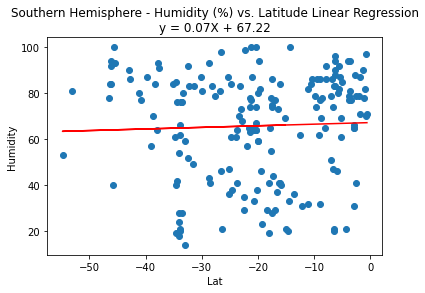

In [76]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plot_linregress(southern_hemisphere_df['Lat'], southern_hemisphere_df['Humidity'], 'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
# from the linear regression we can find that humidity and latitude do not have good linear coorelation in southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.12


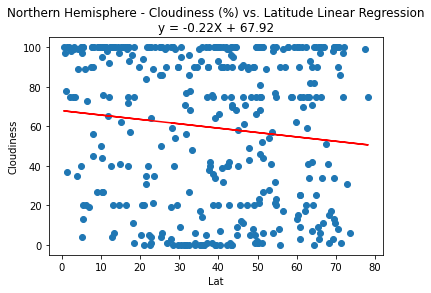

In [77]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

plot_linregress(northern_hemisphere_df['Lat'], northern_hemisphere_df['Cloudiness'], 'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
# from the linear regression we can find that cloudness and latitude do not have good linear coorelation in northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01


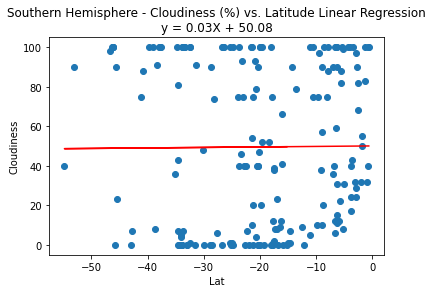

In [78]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plot_linregress(southern_hemisphere_df['Lat'], southern_hemisphere_df['Cloudiness'], 'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
# from the linear regression we can find that cloudness and latitude do not have good linear coorelation in southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.03


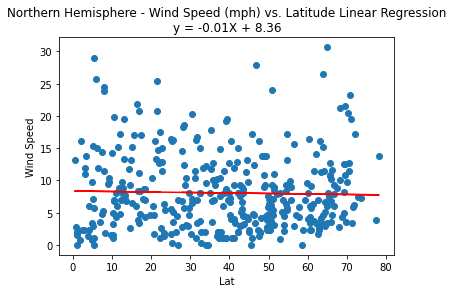

In [79]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plot_linregress(northern_hemisphere_df['Lat'], northern_hemisphere_df['Wind Speed'], 'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
# from the linear regression we can find that wind speen and latitude do not have good linear coorelation in northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.23


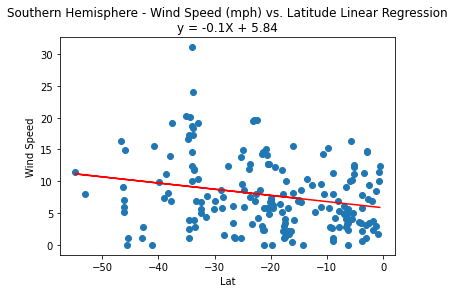

In [81]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plot_linregress(southern_hemisphere_df['Lat'], southern_hemisphere_df['Wind Speed'], 'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
# from the linear regression we can find that windspeed and latitude do not have good linear coorelation in southern hemisphere.